In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Reading data from the excel file

In [ ]:
dataset=pd.read_excel("Data_flight.xlsx")

In [ ]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
## checking for the number of airlines available
np.unique(dataset['Airline'])

array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet',
       'Vistara', 'Vistara Premium economy'], dtype=object)

In [ ]:
np.unique(dataset['Airline']).size

12

In [ ]:
## looing at the number of opbservations for each airline
dataset['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
dataset['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

# finding the null values in the dataset if they exist 

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
#obserbving the relation between prices over the source and destination

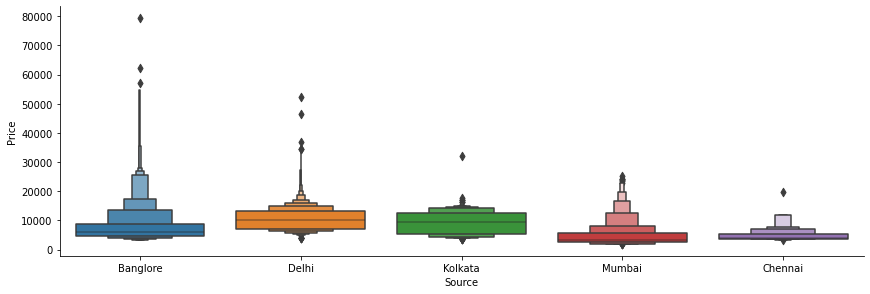

In [ ]:
sns.catplot(y = "Price", x = "Source", data = dataset.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

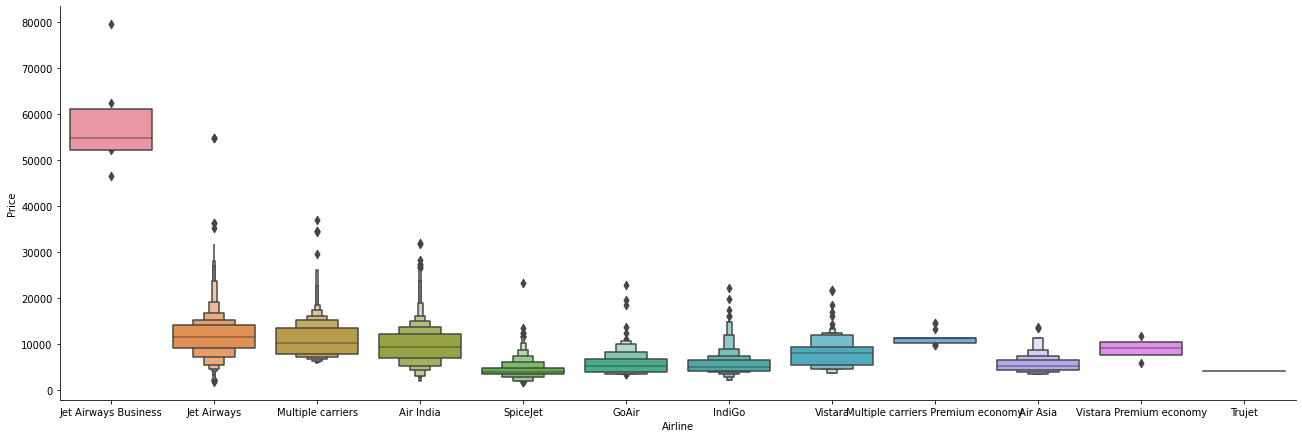

In [ ]:
sns.catplot(y = "Price", x = "Airline", data = dataset.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
## filling the NA values
dataset.dropna(inplace=True)

In [ ]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
#Extracting journey day,month from the date_of_journey into journey_day and journey_month
#deleting the date_of_journey as it is not useful after extraction of day and month

In [ ]:
dataset["Journey_day"] = pd.to_datetime(dataset.Date_of_Journey, format="%d/%m/%Y").dt.day
dataset["Journey_month"] = pd.to_datetime(dataset.Date_of_Journey, format = "%d/%m/%Y").dt.month
dataset.drop(["Date_of_Journey"],axis=1,inplace=True)

In [ ]:
dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
#similarly extracting departure hours and minutes from the departure time

In [ ]:
dataset["Dep_hour"]=pd.to_datetime(dataset.Dep_Time).dt.hour
dataset["Dep_min"]=pd.to_datetime(dataset.Dep_Time).dt.minute
dataset.drop(["Dep_Time"],axis=1,inplace=True)

In [ ]:
dataset

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [ ]:
#similarly extracting arrival hour and minute fromm the arrival time

In [ ]:
dataset["Arrival_hour"] = pd.to_datetime(dataset.Arrival_Time).dt.hour
dataset["Arrival_min"] = pd.to_datetime(dataset.Arrival_Time).dt.minute
dataset.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
dataset["Additional_Info"].describe()

count       10682
unique         10
top       No info
freq         8344
Name: Additional_Info, dtype: object

In [ ]:
#we can observe that more than 90% of the additional info is same as "no_info"
#so we can eliminate the additional info

In [ ]:
dataset.drop(["Additional_Info"],axis=1,inplace=True)

In [ ]:
#since we have source and destination the route column doesn't make value

In [ ]:
dataset.drop(["Route"],axis=1,inplace=True)

In [ ]:
dataset.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


In [ ]:
duration = list(dataset["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) < 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]          
print(duration)
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

['2h 50m', '7h 25m', '19h 0m', '5h 25m', '4h 45m', '2h 25m', '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m', '12h 10m', '2h 35m', '26h 35m', '4h 30m', '22h 35m', '23h 0m', '20h 35m', '5h 10m', '15h 20m', '2h 50m', '2h 55m', '13h 20m', '15h 10m', '5h 45m', '5h 55m', '2h 50m', '2h 15m', '2h 15m', '13h 25m', '2h 50m', '22h 0m', '5h 30m', '10h 25m', '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m', '2h 45m', '12h 0m', '2h 50m', '2h 50m', '2h 15m', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '2h 50m', '3h 0m', '2h 50m', '16h 15m', '15h 5m', '2h 15m', '6h 30m', '25h 5m', '12h 25m', '27h 20m', '10h 15m', '10h 30m', '2h 15m', '10h 25m', '2h 50m', '1h 30m', '13h 20m', '2h 15m', '1h 25m', '26h 30m', '7h 20m', '13h 30m', '5h 0m', '2h 45m', '2h 50m', '1h 30m', '19h 5m', '2h 15m', '14h 50m', '2h 40m', '22h 10m', '9h 35m', '10h 0m', '21h 20m', '5h 25m', '18h 45m', '12h 20m', '18h 0m', '9h 15m', '11h 5m', '17h 30m', '13h 20m', '2h 35m', '2h 25m', '2h 40m', 

In [ ]:
# Adding duration_hours and duration_mins list to train_data dataframe
dataset["Duration_hours"] = duration_hours
dataset["Duration_mins"] = duration_mins

In [ ]:
dataset.drop(["Duration"], axis = 1, inplace = True)

In [ ]:
dataset

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [ ]:
#since source,destination,airlines are the nominal categorical data
#we need to perform one-hot encoding

In [ ]:
dataset[['Airline']].value_counts()

Airline                          
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
dtype: int64

In [ ]:
Airline = dataset[["Airline"]]
Airline = pd.get_dummies(Airline)
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
Airline.shape

(10682, 12)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
dataset[['Destination']].value_counts()

Destination
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
dtype: int64

In [ ]:
Destination = dataset[["Destination"]]
Destination = pd.get_dummies(Destination)
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [ ]:
Destination.shape

(10682, 6)

In [ ]:
dataset[['Source']].value_counts()

Source  
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
dtype: int64

In [ ]:
Source = dataset[["Source"]]
Source = pd.get_dummies(Source)
Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [ ]:
Source.shape

(10682, 5)

In [ ]:
#The prices vary depends on the number of stops so the stop columns fall in ordinal data
#we need to perform label encoding for stops

In [ ]:
dataset[['Total_Stops']].value_counts()

Total_Stops
1 stop         5625
non-stop       3491
2 stops        1520
3 stops          45
4 stops           1
dtype: int64

In [ ]:
dict_Stops = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}

In [ ]:
dataset['Total_Stops'] = dataset['Total_Stops'].map(dict_Stops)

In [ ]:
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [ ]:
dtrain = pd.concat([Source, Destination, dataset, Airline], axis = 1)

In [ ]:
dtrain.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [ ]:
dtrain.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,1,0,0,0,0,0,0,0,0,0,1,0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,0,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,2,13882,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,1,6218,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,13302,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
dtrain.shape

(10682, 33)

## TEST SET

In [ ]:
dtest=pd.read_excel("Flight_Test_set.xlsx")

In [ ]:
dtest.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
dtest.shape

(2671, 10)

In [ ]:
dtest.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [ ]:
dtest['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Change airports                    1
Business class                     1
Name: Additional_Info, dtype: int64

In [ ]:
dtest['Additional_Info'].count()

2671

In [ ]:
## of 2671 observations 2148 observations contain No info... so its better to 
## remove the additional info column

In [ ]:
dtest.drop(['Additional_Info'],axis=1,inplace=True)
dtest.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')

In [ ]:
## preprocessing

print("test data info")
print("-"*75)
print(dtest.info())

print()
print()

print("the null values")
print("-"*75)
dtest.dropna(inplace=True)
print(dtest.isnull().sum())



test data info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
dtypes: object(9)
memory usage: 187.9+ KB
None


the null values
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0

In [ ]:
## EDA

## Date of journey
dtest['day']=pd.to_datetime(dtest['Date_of_Journey'],format="%d/%m/%Y").dt.day
dtest['month']=pd.to_datetime(dtest['Date_of_Journey'],format="%d/%m/%Y").dt.month
dtest.drop(['Date_of_Journey'],axis=1,inplace=True)

##departure time
dtest['dep_hour']=pd.to_datetime(dtest['Dep_Time']).dt.hour
dtest['dep_min']=pd.to_datetime(dtest['Dep_Time']).dt.minute
dtest.drop(['Dep_Time'],axis=1,inplace=True)

## Arrival time
dtest['Arr_hour']=pd.to_datetime(dtest['Arrival_Time']).dt.hour
dtest['Arr_min']=pd.to_datetime(dtest['Arrival_Time']).dt.minute
dtest.drop(['Arrival_Time'],axis=1,inplace=True)

In [ ]:
## Duration
duration=list(dtest['Duration'])
dur_hr=[]
dur_min=[]

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+duration[i]

for i in range(len(duration)):
    dur_hr.append(int(duration[i].split(sep= "h")[0]))
    dur_min.append(int(duration[i].split(sep= "m")[0].split()[-1]))
    
## Adding duration hours and duration mins columns
dtest['dur_hr']=dur_hr
dtest['dur_min']=dur_min
dtest.drop(['Duration'],axis=1,inplace=True)

In [ ]:
dtest[['Airline']].value_counts()

Airline                          
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
dtype: int64

In [ ]:
Airline = dtest[["Airline"]]
Airline = pd.get_dummies(Airline)
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
Airline.shape

(2671, 11)

In [ ]:
dtest[['Destination']].value_counts()

Destination
Cochin         1145
Banglore        710
Delhi           317
New Delhi       238
Hyderabad       186
Kolkata          75
dtype: int64

In [ ]:
Destination = dtest[["Destination"]]
Destination = pd.get_dummies(Destination)
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [ ]:
Destination.shape

(2671, 6)

In [ ]:
dtest[['Source']].value_counts()

Source  
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
dtype: int64

In [ ]:
Source = dtest[["Source"]]
Source = pd.get_dummies(Source)
Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,1,0,0,0,0


In [ ]:
Source.shape

(2671, 5)

In [ ]:
## dealing with categorical data

## Route and total stops are related to each other..so remove route
dtest.drop(['Route'],axis=1,inplace=True)

## Replacing total stops
dict_Stops = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
dtest['Total_Stops'] = dtest['Total_Stops'].map(dict_Stops)

In [ ]:
dtest.head()

,Airline,Source,Destination,Total_Stops,day,month,dep_hour,dep_min,Arr_hour,Arr_min,dur_hr,dur_min
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [ ]:
test_data = pd.concat([Source, Destination, dtest, Airline], axis = 1)
test_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [ ]:
test_data.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops,day,month,dep_hour,dep_min,Arr_hour,Arr_min,dur_hr,dur_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,1,0,0,0,0,1,6,6,17,30,4,25,10,55,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,0,1,12,5,6,20,10,20,4,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,1,21,5,19,15,19,0,23,45,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,0,1,21,5,8,0,21,0,13,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,24,6,23,55,2,45,2,50,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data.shape

(2671, 31)

## Feature Selection
#### Following are some of feature selection methods:
#### 1. Heatmap
#### 2.feature_importance
#### 3.SelectKBest

In [ ]:
## dtrain -- Train data
## test_data -- Test data

In [ ]:
dtrain.shape

(10682, 33)

In [ ]:
dtrain.columns

Index(['Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [ ]:
x=dtrain.loc[:,['Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata','Source_Mumbai',
                'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
                'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins', 'Total_Stops',
                'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
                'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 
                'Airline_Vistara Premium economy']]
x.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Total_Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,1,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,0,1,5,5,50,13,15,7,25,2,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,9,6,9,25,4,25,19,0,2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,12,5,18,5,23,30,5,25,1,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,3,16,50,21,35,4,45,1,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
x.shape

(10682, 32)

In [ ]:
y=dtrain['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

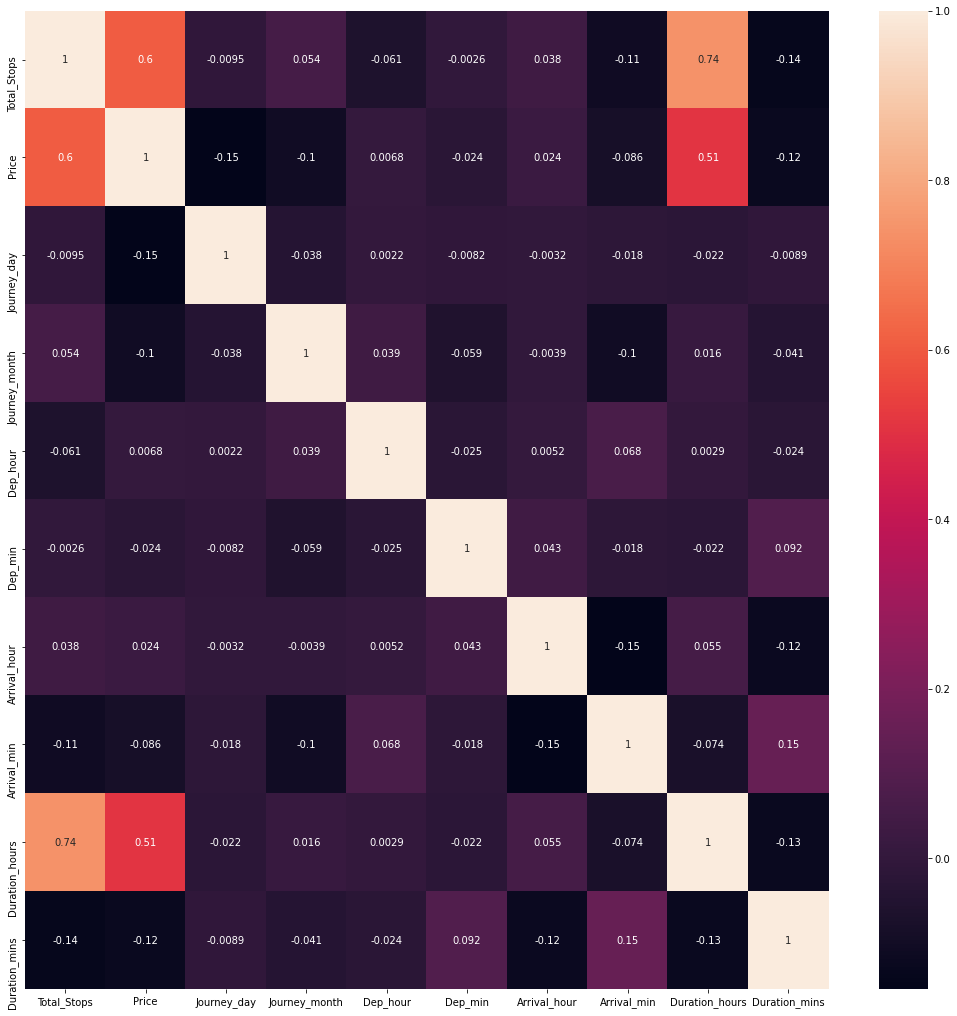

In [ ]:
## heatmap generation between independent and dependent variables
plt.figure(figsize = (18,18))
sns.heatmap(dataset.corr(), annot=True)

plt.show()

In [ ]:
## important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(selection.feature_importances_)

[8.23845428e-03 4.46222644e-04 1.40393784e-02 2.36445600e-03
 7.26626867e-03 1.89972274e-03 8.50249243e-03 1.56605759e-02
 7.01738138e-03 5.05176295e-04 1.71458250e-02 1.44081740e-01
 5.31658171e-02 2.37415638e-02 2.08077389e-02 2.74635928e-02
 1.84405143e-02 1.26009722e-01 1.76778571e-02 2.17050188e-01
 1.75584495e-03 1.01748785e-02 1.80229670e-03 1.79703960e-02
 1.42513722e-01 6.79704616e-02 1.73099874e-02 7.78054070e-04
 3.13477374e-03 8.90233361e-05 4.89173585e-03 8.41372510e-05]


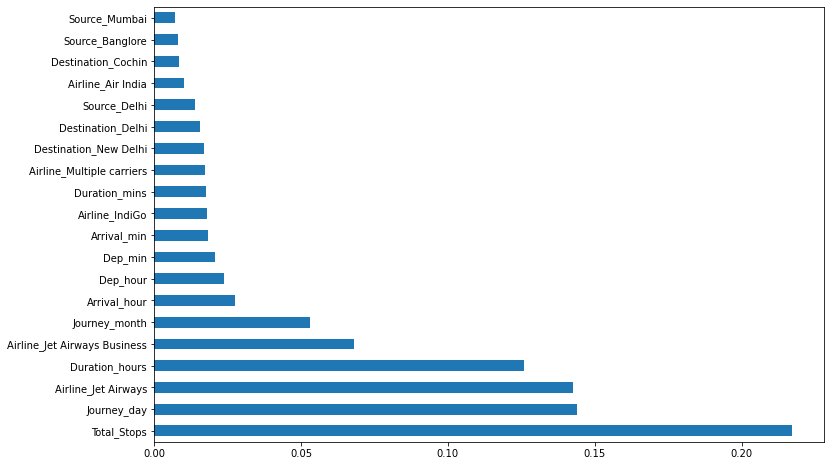

In [ ]:
## graph of feature importances
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


## Fitting Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=6)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred=reg_rf.predict(x_test)

In [ ]:
reg_rf.score(x_train,y_train)

0.9561732730228009

In [ ]:
reg_rf.score(x_test,y_test)

0.822412855094374

In [ ]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1186.6757388883261
MSE: 3883833.2240974326
RMSE: 1970.744332504202


In [ ]:
metrics.r2_score(y_test,y_pred)

0.822412855094374

#Neural network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [ ]:
x_train.shape

(7477, 32)

In [ ]:
# Neural network
model = Sequential()
model.add(Dense(400, input_dim= 32, activation="relu"))
model.add(Dense(200, input_dim= 400, activation="relu"))
model.add(Dense(200, input_dim= 200, activation="relu"))
model.add(Dense(1, activation="linear"))

In [ ]:
keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 400)               13200     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_6 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 201       
Total params: 133,801
Trainable params: 133,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64,validation_split=0.15,validation_data=None,verbose=1)

Epoch 1/100
100/100 [==============================] - 2s 7ms/step - loss: 76546640.6733 - mse: 76546640.6733 - val_loss: 22173182.0000 - val_mse: 22173182.0000
Epoch 2/100
100/100 [==============================] - 0s 5ms/step - loss: 17812761.9208 - mse: 17812761.9208 - val_loss: 17948266.0000 - val_mse: 17948266.0000
Epoch 3/100
100/100 [==============================] - 0s 5ms/step - loss: 15109940.5545 - mse: 15109940.5545 - val_loss: 16747598.0000 - val_mse: 16747598.0000
Epoch 4/100
100/100 [==============================] - 0s 5ms/step - loss: 13556042.2970 - mse: 13556042.2970 - val_loss: 15341995.0000 - val_mse: 15341995.0000
Epoch 5/100
100/100 [==============================] - 0s 5ms/step - loss: 10986264.5297 - mse: 10986264.5297 - val_loss: 14023058.0000 - val_mse: 14023058.0000
Epoch 6/100
100/100 [==============================] - 0s 5ms/step - loss: 12182645.4059 - mse: 12182645.4059 - val_loss: 12902364.0000 - val_mse: 12902364.0000
Epoch 7/100
100/100 [=============

In [ ]:
model.predict(x_test)

array([[ 5532.2915],
       [ 2365.5754],
       [14141.758 ],
       ...,
       [ 6811.836 ],
       [ 5835.234 ],
       [11031.268 ]], dtype=float32)

In [ ]:
y_test

6753      4508
9142      1965
6400     10588
7276      8529
10536    11200
         ...  
4710     13376
1618      3841
3404      6206
2463      5613
267       8366
Name: Price, Length: 3205, dtype: int64

In [ ]:
x_test.head(1)

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Total_Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
6753,0,0,0,1,0,1,0,0,0,0,0,6,6,19,55,22,25,2,30,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
user_input=[[0,	0	,0	,1	,0	,1	,0	,0	,0	,0	,0	,6	,6	,19,	55,	22,	25,	2,	30,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0]]
#user_input = SSC.fit_transform(user_input)
p=model.predict(user_input)
print(p)

[[5532.2915]]


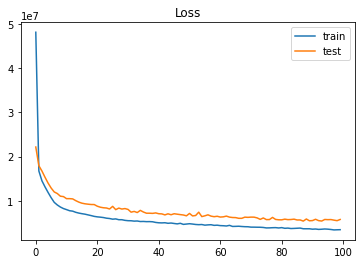

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

#Tflite

In [ ]:
from tensorflow import lite

In [ ]:
# Convert Keras model to TF Lite format.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_float_model = converter.convert()

# Show model size in KBs.
float_model_size = len(tflite_float_model) / 1024
print('Float model size = %dKBs.' % float_model_size)

INFO:tensorflow:Assets written to: /tmp/tmpsduxtk19/assets
Float model size = 524KBs.


In [ ]:
# Re-convert the model to TF Lite using quantization.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Show model size in KBs.
quantized_model_size = len(tflite_quantized_model) / 1024
print('Quantized model size = %dKBs,' % quantized_model_size)
print('which is about %d%% of the float model size.'\
      % (quantized_model_size * 100 / float_model_size))

INFO:tensorflow:Assets written to: /tmp/tmpw9xqqeas/assets


INFO:tensorflow:Assets written to: /tmp/tmpw9xqqeas/assets


Quantized model size = 135KBs,
which is about 25% of the float model size.


In [ ]:
# Save the quantized model to file to the Downloads directory
f = open('FlightFare.tflite', "wb")
f.write(tflite_quantized_model)
f.close()

# Download the digit classification model
from google.colab import files
files.download('FlightFare.tflite')

print('`FlightFare.tflite` has been downloaded')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

`FlightFare.tflite` has been downloaded
